## 1. Problem Framing
Predict a person's **salary** based on **years of experience**.
 
- Input (X): Years of Experience
- Output (Y): Salary
- Type: Supervised Learning (Regression)

In [2]:
import numpy as np
 
# Input data: Years of Experience
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
 
# Output data: Salary
y = np.array([25000, 30000, 35000, 45000, 50000])
 
X, y

(array([[1],
        [2],
        [3],
        [4],
        [5]]),
 array([25000, 30000, 35000, 45000, 50000]))

In [3]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
 
X_train, X_test

(array([[5],
        [3],
        [1],
        [4]]),
 array([[2]]))

In [4]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression()
model.fit(X_train, y_train)
 
print("Slope (m):", model.coef_[0])
print("Intercept (c):", model.intercept_)

Slope (m): 6428.571428571427
Intercept (c): 17857.142857142862


In [5]:
y_pred = model.predict(X_test)
y_pred

array([30714.28571429])

In [6]:
 
new_experience = np.array([[6]])
predicted_salary = model.predict(new_experience)
 
print("Predicted salary for 6 years experience:", predicted_salary[0])

Predicted salary for 6 years experience: 56428.57142857142


In [7]:
from sklearn.metrics import mean_squared_error
 
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 510204.0816326575


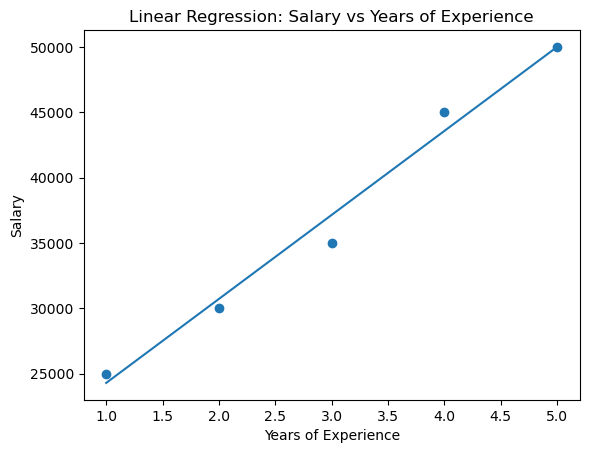

In [8]:
import matplotlib.pyplot as plt
import numpy as np
 
# Create smooth values for X-axis (for straight line)
X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
 
# Predict salary for the line
y_line = model.predict(X_line)
 
# Plot actual data points
plt.figure()
plt.scatter(X, y)
 
# Plot regression line
plt.plot(X_line, y_line)
 
# Labels and title
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Linear Regression: Salary vs Years of Experience")
 
# Show plot
plt.show()
 

In [12]:
import pandas as pd
df=pd.read_csv("Salary_Data.csv")

In [13]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [14]:
df.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [16]:
df.shape

(30, 2)

<Axes: >

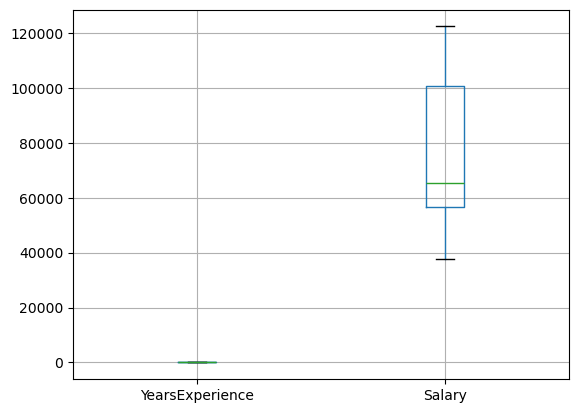

In [17]:
df.boxplot()

In [18]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [19]:
print("duplicate rows:",df.duplicated().sum())
df.drop_duplicates(inplace=True)

duplicate rows: 0


<Axes: >

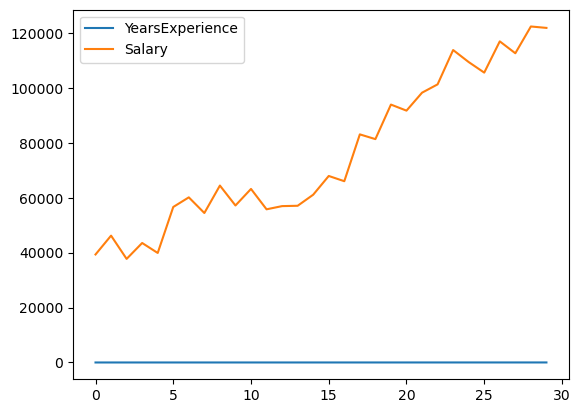

In [20]:
df.plot()

In [23]:
from sklearn.model_selection import train_test_split
X=df[["YearsExperience"]]
y=df[["Salary"]]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [25]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [26]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(mse)
print(r2)

49830096.85590839
0.9024461774180497


In [27]:
print(model.coef_[0])
print(model.intercept_)

[9423.81532303]
[25321.58301178]


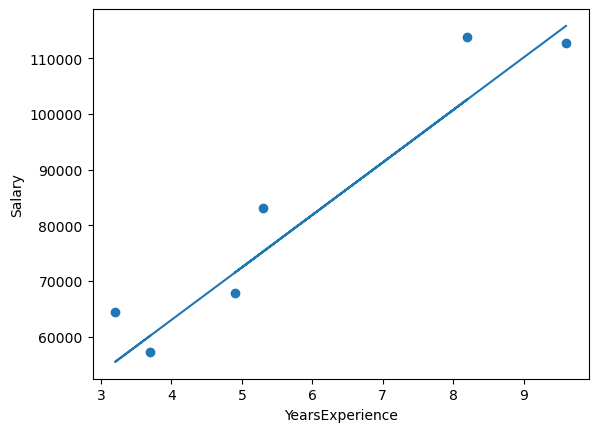

In [29]:
import matplotlib.pyplot as plt
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred)
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()